In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


In [ ]:
# Define the path to your GTD dataset CSV file
gtd_file_path = '/kaggle/input/gtd/globalterrorismdb_0718dist.csv'

# Read the CSV file and select only the specified columns
df = pd.read_csv(gtd_file_path, encoding='ISO-8859-1', low_memory = False )

# DataFrame
df.shape

(181691, 135)

In [ ]:
# Check for missing values in batches of columns and print the count of missing values
batch_size = 10  # You can adjust the batch size as needed
total_columns = len(df.columns)

for i in range(0, total_columns, batch_size):
    batch_columns = df.columns[i:i + batch_size]
    missing_values_count = df[batch_columns].isnull().sum()
    print(f"Missing Values in Columns {i + 1}-{i + batch_size}:\n{missing_values_count}\n")


Missing Values in Columns 1-10:
eventid             0
iyear               0
imonth              0
iday                0
approxdate     172452
extended            0
resolution     179471
country             0
country_txt         0
region              0
dtype: int64

Missing Values in Columns 11-20:
region_txt          0
provstate         421
city              435
latitude         4556
longitude        4557
specificity         6
vicinity            0
location       126196
summary         66129
crit1               0
dtype: int64

Missing Values in Columns 21-30:
crit2                   0
crit3                   0
doubtterr               1
alternative        152680
alternative_txt    152680
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
dtype: int64

Missing Values in Columns 31-40:
attacktype2         175377
attacktype2_txt     175377
attacktype3         181263
attacktype3_txt     181263
targtype1          

In [ ]:
import pandas as pd

# Define the list of columns you want to select
selected_columns = [
    'iyear', 'imonth', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude',
    'success', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt',
    'nkill', 'nwound', 'gname', 'motive', 'summary', 'related',
    'provstate', 'city', 'nperps', 'propextent', 'ishostkid', 'ransom'
]

# Define the path to your GTD dataset CSV file
gtd_file_path = '/kaggle/input/gtd/globalterrorismdb_0718dist.csv'

# Read the CSV file and select only the specified columns
df = pd.read_csv(gtd_file_path, usecols=selected_columns, encoding='ISO-8859-1')

# DataFrame containing only the 22 selected columns
df.shape

(181691, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   country_txt      181691 non-null  object 
 3   region_txt       181691 non-null  object 
 4   provstate        181270 non-null  object 
 5   city             181256 non-null  object 
 6   latitude         177135 non-null  float64
 7   longitude        177134 non-null  float64
 8   summary          115562 non-null  object 
 9   success          181691 non-null  int64  
 10  attacktype1_txt  181691 non-null  object 
 11  targtype1_txt    181691 non-null  object 
 12  gname            181691 non-null  object 
 13  motive           50561 non-null   object 
 14  nperps           110576 non-null  float64
 15  weaptype1_txt    181691 non-null  object 
 16  nkill            171378 non-null  floa

In [ ]:
# Assuming you have already read the data into a DataFrame 'df'
df.columns = [
    'Year', 'Month', 'Country', 'Region', 'State', 'City', 'Latitude', 'Longitude',
    'Summary', 'Success', 'Attack_Type', 'Target_Type', 'Terrorist_Group', 'Motive',
    'Num_Perpetrators', 'Weapon_Type', 'Num_Killed', 'Num_Wounded', 'Property_Damage_Extent',
    'Is_Hostage_Taken', 'Ransom_Demanded', 'Related_Incidents'
]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Year                    181691 non-null  int64  
 1   Month                   181691 non-null  int64  
 2   Country                 181691 non-null  object 
 3   Region                  181691 non-null  object 
 4   State                   181270 non-null  object 
 5   City                    181256 non-null  object 
 6   Latitude                177135 non-null  float64
 7   Longitude               177134 non-null  float64
 8   Summary                 115562 non-null  object 
 9   Success                 181691 non-null  int64  
 10  Attack_Type             181691 non-null  object 
 11  Target_Type             181691 non-null  object 
 12  Terrorist_Group         181691 non-null  object 
 13  Motive                  50561 non-null   object 
 14  Num_Perpetrators    

In [ ]:
# Check for and remove duplicates in the DataFrame
df.drop_duplicates(inplace=True)

# Reset the index and drop the old index column
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174137 entries, 0 to 174136
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Year                    174137 non-null  int64  
 1   Month                   174137 non-null  int64  
 2   Country                 174137 non-null  object 
 3   Region                  174137 non-null  object 
 4   State                   173716 non-null  object 
 5   City                    173702 non-null  object 
 6   Latitude                169812 non-null  float64
 7   Longitude               169811 non-null  float64
 8   Summary                 113281 non-null  object 
 9   Success                 174137 non-null  int64  
 10  Attack_Type             174137 non-null  object 
 11  Target_Type             174137 non-null  object 
 12  Terrorist_Group         174137 non-null  object 
 13  Motive                  50111 non-null   object 
 14  Num_Perpetrators    

In [ ]:
df.isnull().sum()

Year                           0
Month                          0
Country                        0
Region                         0
State                        421
City                         435
Latitude                    4325
Longitude                   4326
Summary                    60856
Success                        0
Attack_Type                    0
Target_Type                    0
Terrorist_Group                0
Motive                    124026
Num_Perpetrators           65974
Weapon_Type                    0
Num_Killed                  9278
Num_Wounded                14966
Property_Damage_Extent    113002
Is_Hostage_Taken             177
Ransom_Demanded           102143
Related_Incidents         151929
dtype: int64

In [ ]:
# List of columns with data type "object" and missing values
object_columns_with_missing = ['Country', 'Region', 'State', 'City', 'Summary', 'Attack_Type', 'Target_Type', 'Terrorist_Group', 'Motive', 'Related_Incidents']

# Fill missing values in these columns with "Unknown"
df[object_columns_with_missing] = df[object_columns_with_missing].fillna('Unknown')


In [ ]:
# Create a list of numeric columns (excluding "Latitude" and "Longitude")
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.difference(['Latitude', 'Longitude'])

# Make all values in numeric columns positive
df[numeric_columns] = df[numeric_columns].abs()

# Fill missing values in numeric columns with the median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174137 entries, 0 to 174136
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Year                    174137 non-null  int64  
 1   Month                   174137 non-null  int64  
 2   Country                 174137 non-null  object 
 3   Region                  174137 non-null  object 
 4   State                   174137 non-null  object 
 5   City                    174137 non-null  object 
 6   Latitude                169812 non-null  float64
 7   Longitude               169811 non-null  float64
 8   Summary                 174137 non-null  object 
 9   Success                 174137 non-null  int64  
 10  Attack_Type             174137 non-null  object 
 11  Target_Type             174137 non-null  object 
 12  Terrorist_Group         174137 non-null  object 
 13  Motive                  174137 non-null  object 
 14  Num_Perpetrators    

In [ ]:
# Reset the index and drop the old index column
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174137 entries, 0 to 174136
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Year                    174137 non-null  int64  
 1   Month                   174137 non-null  int64  
 2   Country                 174137 non-null  object 
 3   Region                  174137 non-null  object 
 4   State                   174137 non-null  object 
 5   City                    174137 non-null  object 
 6   Latitude                169812 non-null  float64
 7   Longitude               169811 non-null  float64
 8   Summary                 174137 non-null  object 
 9   Success                 174137 non-null  int64  
 10  Attack_Type             174137 non-null  object 
 11  Target_Type             174137 non-null  object 
 12  Terrorist_Group         174137 non-null  object 
 13  Motive                  174137 non-null  object 
 14  Num_Perpetrators    

In [ ]:
# Check for and remove duplicates in the DataFrame
df.drop_duplicates(inplace=True)

# Reset the index and drop the old index column
df.reset_index(drop=True, inplace=True)

In [ ]:
# Drop rows with missing values in the "Latitude" and "Longitude" columns
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)


In [ ]:
# Reset the index and drop the old index column
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169447 entries, 0 to 169446
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Year                    169447 non-null  int64  
 1   Month                   169447 non-null  int64  
 2   Country                 169447 non-null  object 
 3   Region                  169447 non-null  object 
 4   State                   169447 non-null  object 
 5   City                    169447 non-null  object 
 6   Latitude                169447 non-null  float64
 7   Longitude               169447 non-null  float64
 8   Summary                 169447 non-null  object 
 9   Success                 169447 non-null  int64  
 10  Attack_Type             169447 non-null  object 
 11  Target_Type             169447 non-null  object 
 12  Terrorist_Group         169447 non-null  object 
 13  Motive                  169447 non-null  object 
 14  Num_Perpetrators    

In [ ]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,Year,Month,Latitude,Longitude,Success,Num_Perpetrators,Num_Killed,Num_Wounded,Property_Damage_Extent,Is_Hostage_Taken,Ransom_Demanded
count,169447.000000,169447.000000,169447.000000,1.694470e+05,169447.000000,169447.000000,169447.000000,169447.000000,169447.000000,169447.000000,169447.000000
mean,2003.318660,6.464865,23.641355,-4.794050e+02,0.888024,88.016318,2.317922,3.032394,3.102640,0.089426,0.080344
std,13.000977,3.393611,18.278798,2.093724e+05,0.315338,170.202711,11.408896,35.494718,0.320347,0.442896,0.812570
min,1970.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1991.000000,4.000000,11.648864,7.084806e+00,1.000000,99.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,2009.000000,6.000000,31.502407,4.349150e+01,1.000000,99.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,2014.000000,9.000000,34.621521,6.903175e+01,1.000000,99.000000,2.000000,2.000000,3.000000,0.000000,0.000000
max,2017.000000,12.000000,74.633553,1.793667e+02,1.000000,25000.000000,1570.000000,8191.000000,4.000000,9.000000,9.000000


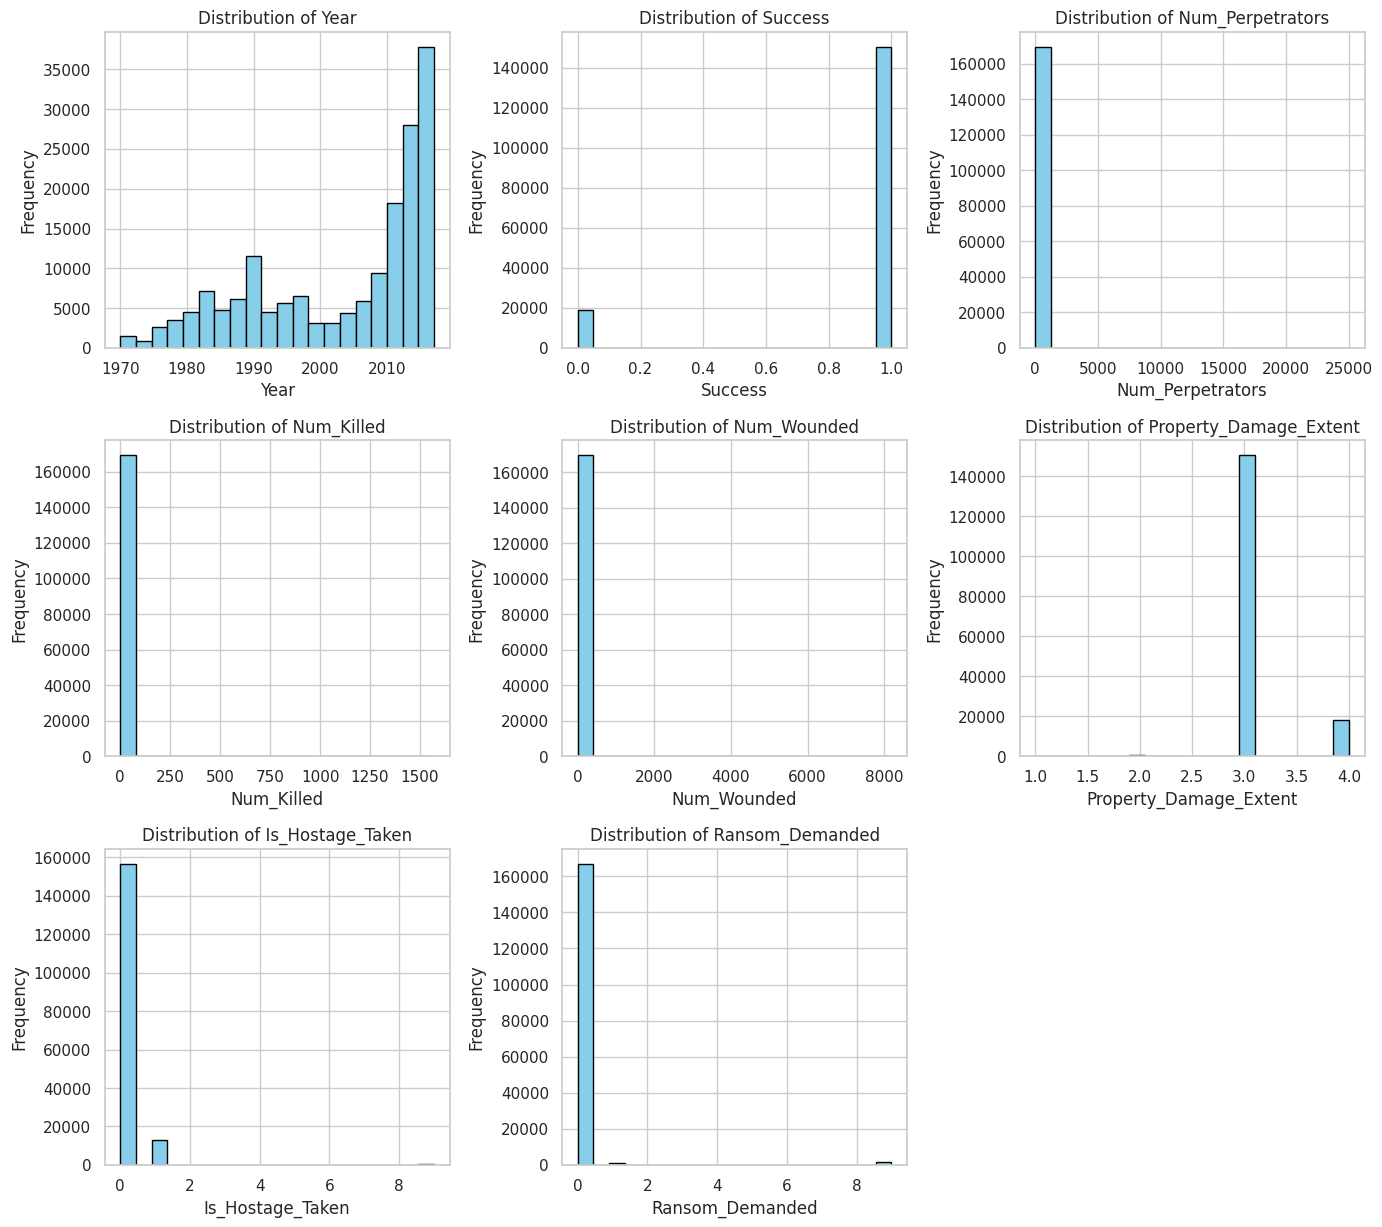

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Exclude specific columns from the selection
excluded_columns = ['Latitude', 'Longitude', 'Month']

# Select columns with integer data types, excluding the specified columns
integer_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=excluded_columns)

# Calculate the number of rows and columns needed for subplots
num_columns = len(integer_columns.columns)
num_rows = (num_columns // 3) + (num_columns % 3)  # Adjust the number of rows as needed

# Set the figure size
plt.figure(figsize=(14, num_rows * 4))

# Loop through integer columns and create histograms
for i, column in enumerate(integer_columns.columns):
    plt.subplot(num_rows, 3, i + 1)  # Adjust the number of columns (3) based on your preference
    df[column].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Exclude specific columns from the selection
excluded_columns = ['Latitude', 'Longitude', 'Month']

# Select columns with integer and float data types, excluding the specified columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=excluded_columns)

# Get value counts for each numeric column
value_counts_info = {}
for column in numeric_columns.columns:
    value_counts_info[column] = df[column].value_counts()

# Print the value counts information for each numeric column
for column, counts in value_counts_info.items():
    print(f'Column: {column}')
    print(counts)
    print('-' * 50)


Column: Year
Year
2014    16312
2015    14402
2016    12855
2013    11731
2017    10566
2012     8332
2011     5048
2010     4818
2008     4754
2009     4705
1992     4577
1991     4163
1989     3926
1990     3426
1988     3323
2007     3188
1994     3125
1987     2850
1997     2813
1996     2769
2006     2715
1984     2612
1986     2547
1995     2514
1983     2383
1981     2251
1985     2245
1980     2243
1979     2165
1982     2150
2005     1985
2001     1883
2000     1772
1999     1341
1978     1326
2002     1307
2003     1263
2004     1137
1977     1120
1998      891
1976      821
1975      665
1970      616
1974      513
1972      445
1971      430
1973      424
Name: count, dtype: int64
--------------------------------------------------
Column: Success
Success
1    150473
0     18974
Name: count, dtype: int64
--------------------------------------------------
Column: Num_Perpetrators
Num_Perpetrators
99.0     141823
1.0        8300
2.0        5968
3.0        2790
4.0        2170


In [ ]:
import pandas as pd

# Exclude specific columns from the selection
excluded_columns = ['Latitude', 'Longitude', 'Month']

# Select columns with integer and float data types, excluding the specified columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=excluded_columns)

# Get and print the top 25 value counts for each numeric column
for column in numeric_columns.columns:
    top_counts = df[column].value_counts().head(25)
    print(f'Column: {column}')
    print(top_counts)
    print('-' * 50)


Column: Year
Year
2014    16312
2015    14402
2016    12855
2013    11731
2017    10566
2012     8332
2011     5048
2010     4818
2008     4754
2009     4705
1992     4577
1991     4163
1989     3926
1990     3426
1988     3323
2007     3188
1994     3125
1987     2850
1997     2813
1996     2769
2006     2715
1984     2612
1986     2547
1995     2514
1983     2383
Name: count, dtype: int64
--------------------------------------------------
Column: Success
Success
1    150473
0     18974
Name: count, dtype: int64
--------------------------------------------------
Column: Num_Perpetrators
Num_Perpetrators
99.0     141823
1.0        8300
2.0        5968
3.0        2790
4.0        2170
5.0        1065
6.0         760
10.0        653
20.0        622
30.0        555
50.0        514
15.0        417
100.0       408
7.0         372
8.0         357
40.0        276
200.0       274
12.0        266
25.0        177
60.0        147
9.0         138
0.0         130
150.0       126
300.0       121
70.0

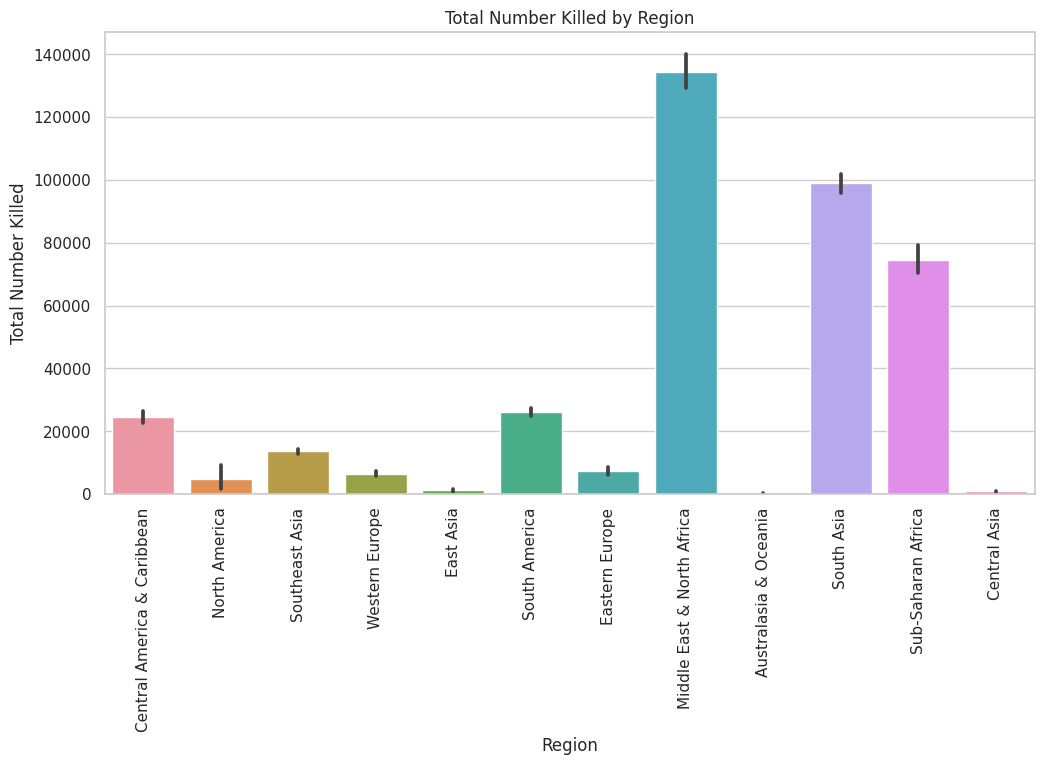

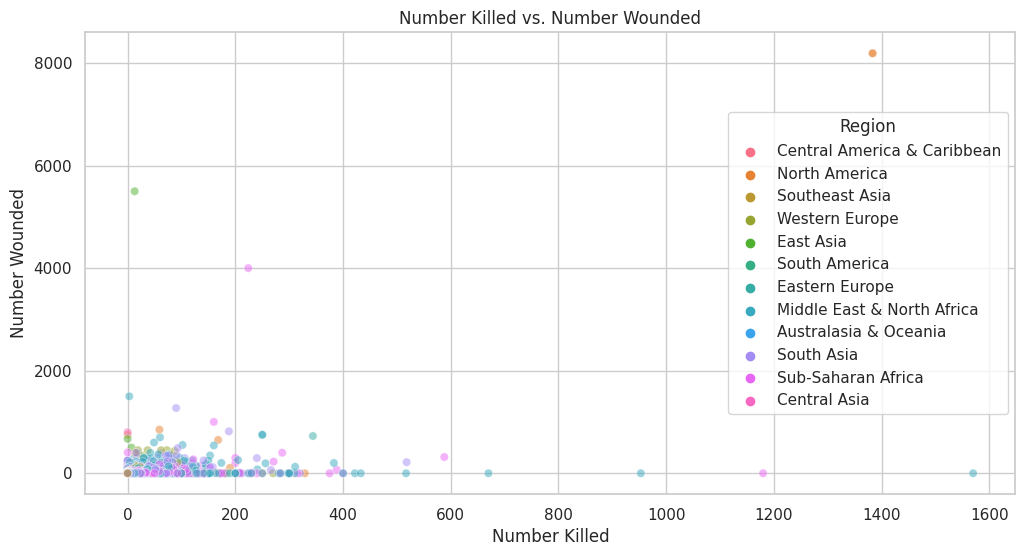

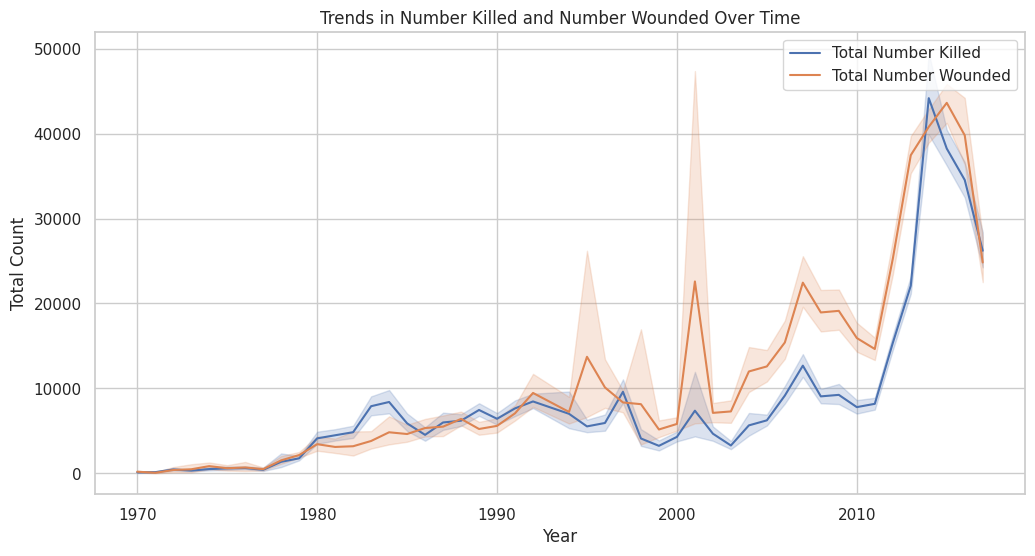

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")


# Bar charts
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Region', y='Num_Killed', estimator=sum)
plt.title('Total Number Killed by Region')
plt.xticks(rotation=90)
plt.ylabel('Total Number Killed')
plt.show()

# Scatter plots
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Num_Killed', y='Num_Wounded', hue='Region', alpha=0.5)
plt.title('Number Killed vs. Number Wounded')
plt.xlabel('Number Killed')
plt.ylabel('Number Wounded')
plt.legend(title='Region')
plt.show()

# Plotting trends over time (assuming 'Year' column)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Num_Killed', estimator=sum, label='Total Number Killed')
sns.lineplot(data=df, x='Year', y='Num_Wounded', estimator=sum, label='Total Number Wounded')
plt.title('Trends in Number Killed and Number Wounded Over Time')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.legend()
plt.show()


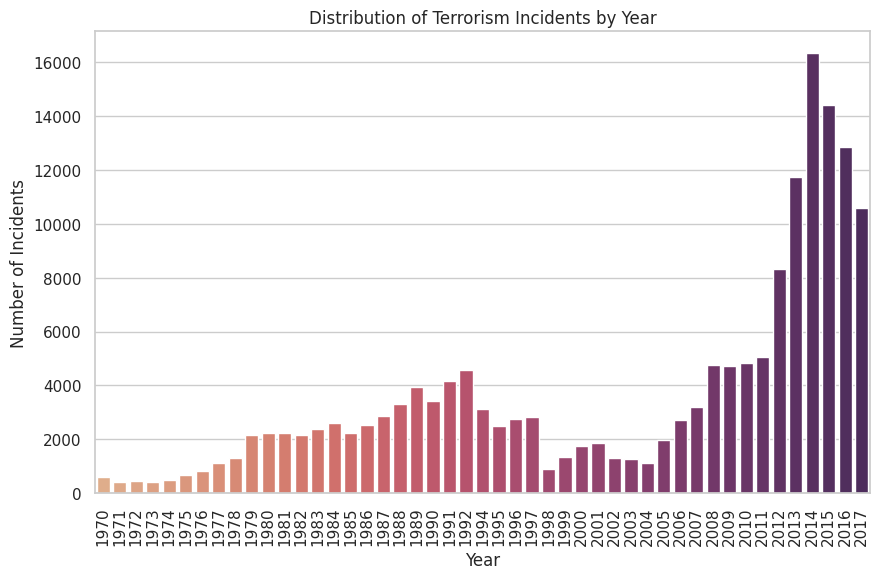

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Year",palette="flare")
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Terrorism Incidents by Year')
plt.xticks(rotation=90)
plt.show()

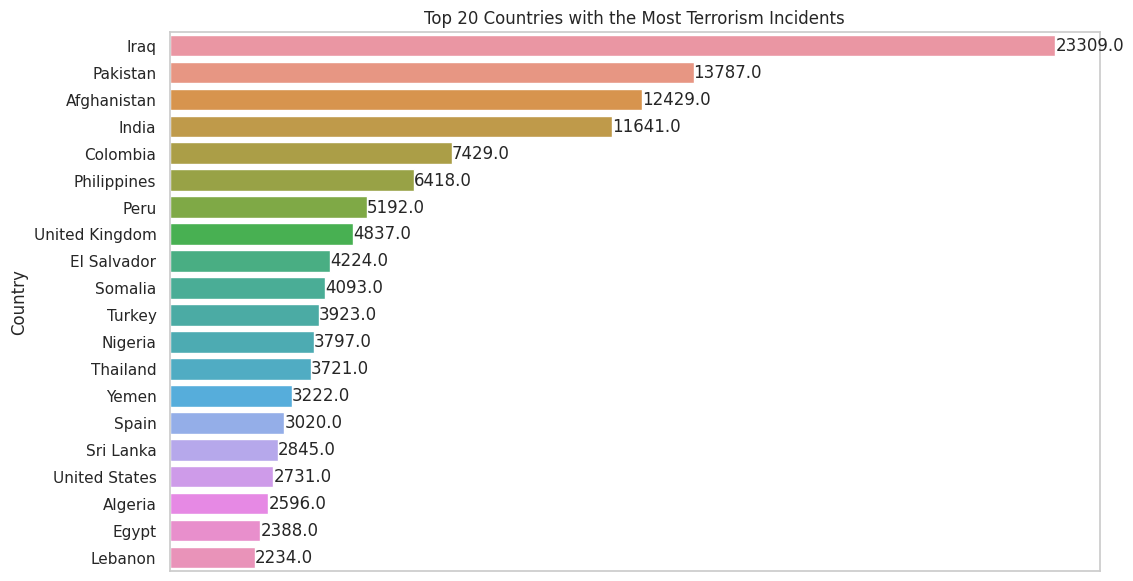

In [ ]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, y="Country", order=df['Country'].value_counts().index[:20])

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center')

plt.xlabel('')
plt.ylabel('Country')
plt.title('Top 20 Countries with the Most Terrorism Incidents')

# Remove the x-axis ticks and labels
ax.set_xticks([])

plt.show()


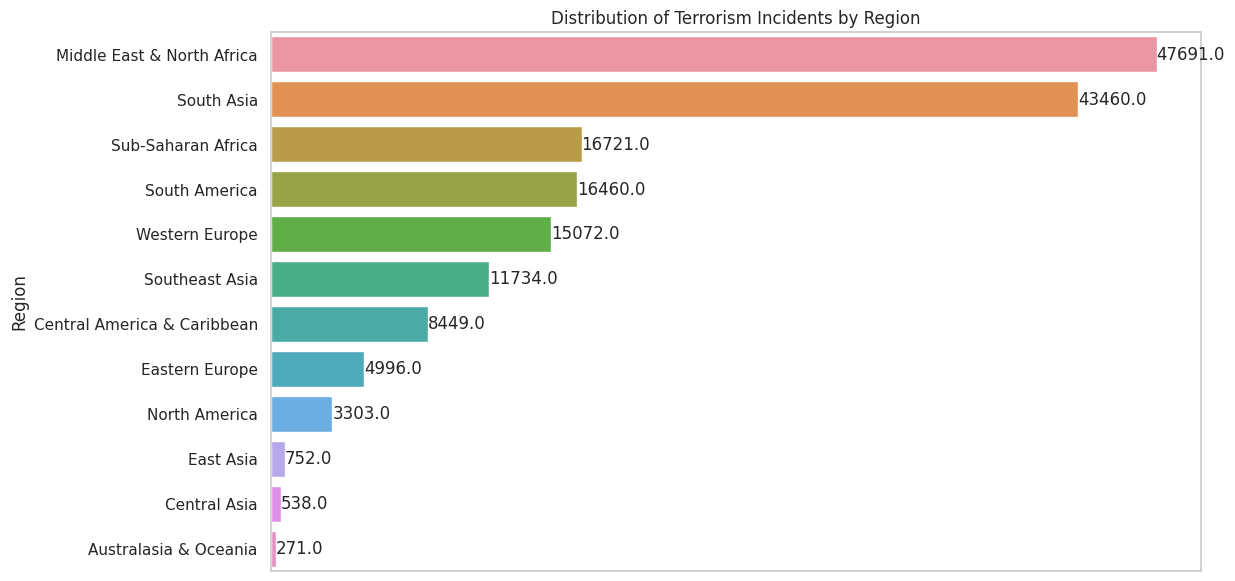

In [ ]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, y="Region", order=df['Region'].value_counts().index)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center')

plt.xlabel('')
plt.ylabel('Region')
plt.title('Distribution of Terrorism Incidents by Region')

# Remove the x-axis ticks and labels
ax.set_xticks([])

plt.show()


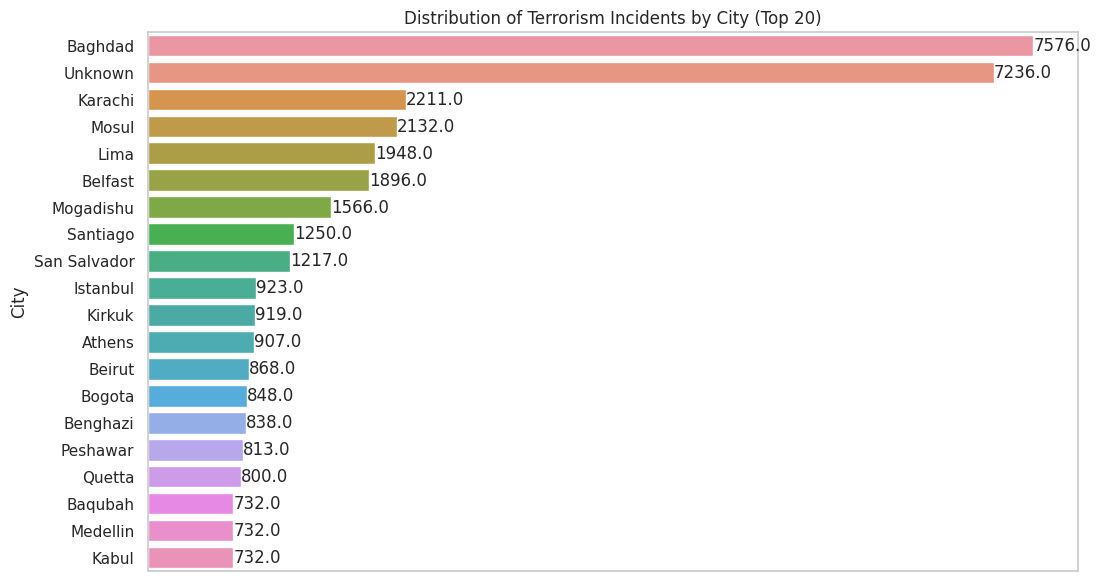

In [ ]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, y="City", order=df['City'].value_counts().index[:20])

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center')

plt.xlabel('')
plt.ylabel('City')
plt.title('Distribution of Terrorism Incidents by City (Top 20)')

# Remove the x-axis ticks and labels
ax.set_xticks([])

plt.show()


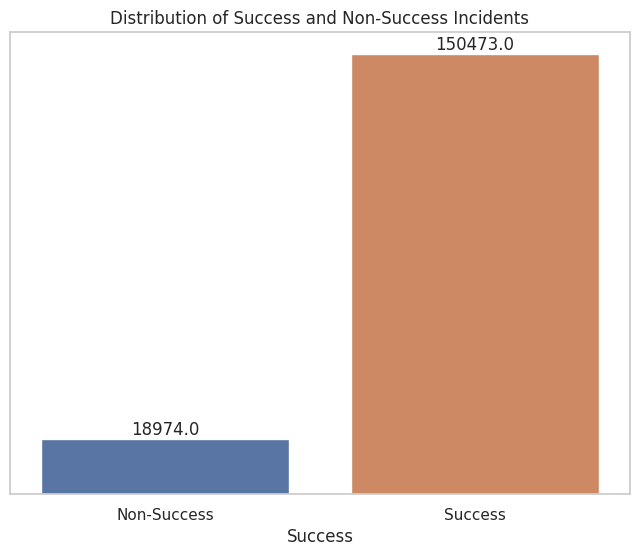

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="Success")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Success')
plt.ylabel('')  # Set the y-axis label to an empty string
plt.title('Distribution of Success and Non-Success Incidents')
plt.xticks(ticks=[0, 1], labels=['Non-Success', 'Success'])

# Remove the y-axis ticks and labels
ax.set_yticks([])

plt.show()


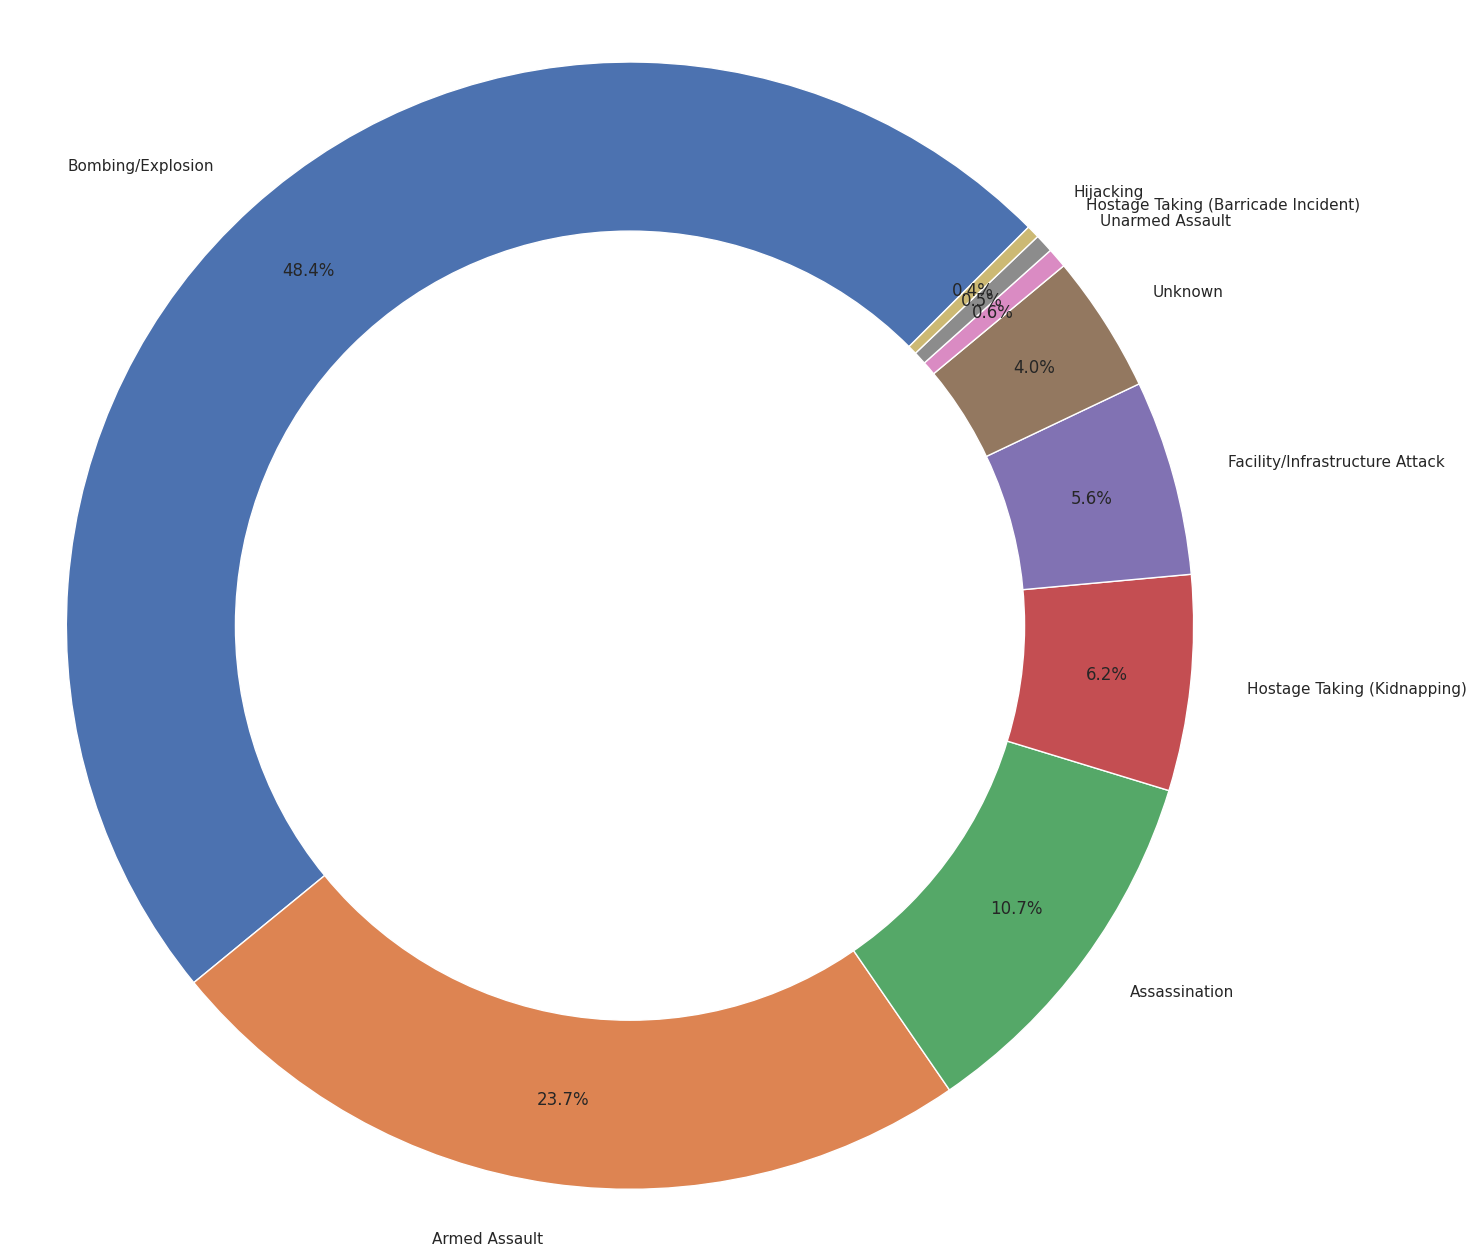

In [ ]:
# Count the number of suicide and non-suicide attacks
attack_counts = df['Attack_Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(16, 16))

# Outer pie chart (larger)
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=45, pctdistance=0.85)

# Inner pie chart (smaller, white circle to create a donut effect)
inner_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(inner_circle)

plt.title('')
plt.axis('equal')  # Equal aspect ratio ensures that the circle is circular.

plt.show()


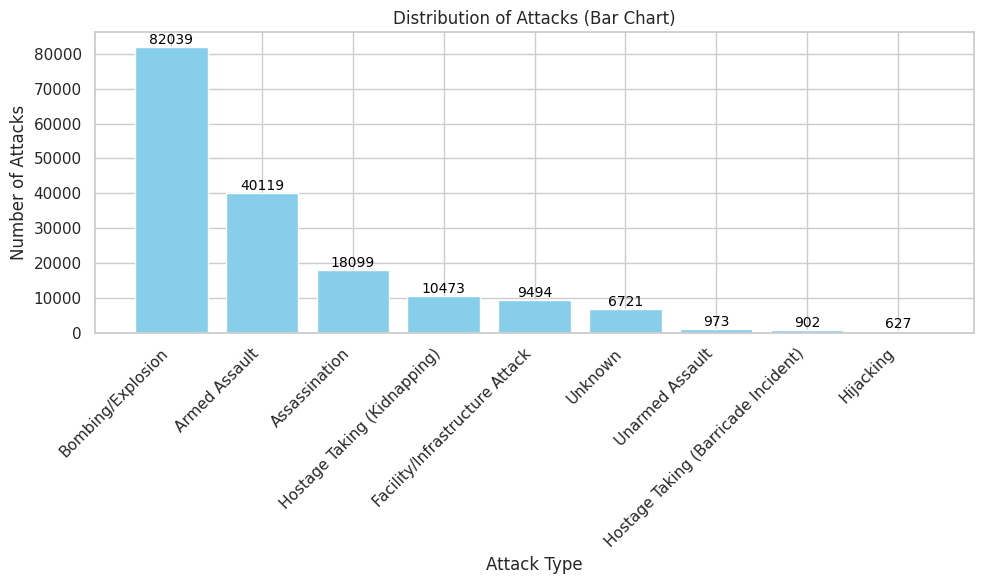

In [ ]:
# Count the number of attacks by type
attack_counts = df['Attack_Type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(attack_counts.index, attack_counts.values, color='skyblue')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.title('Distribution of Attacks (Bar Chart)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate the bars with values
for i, v in enumerate(attack_counts.values):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


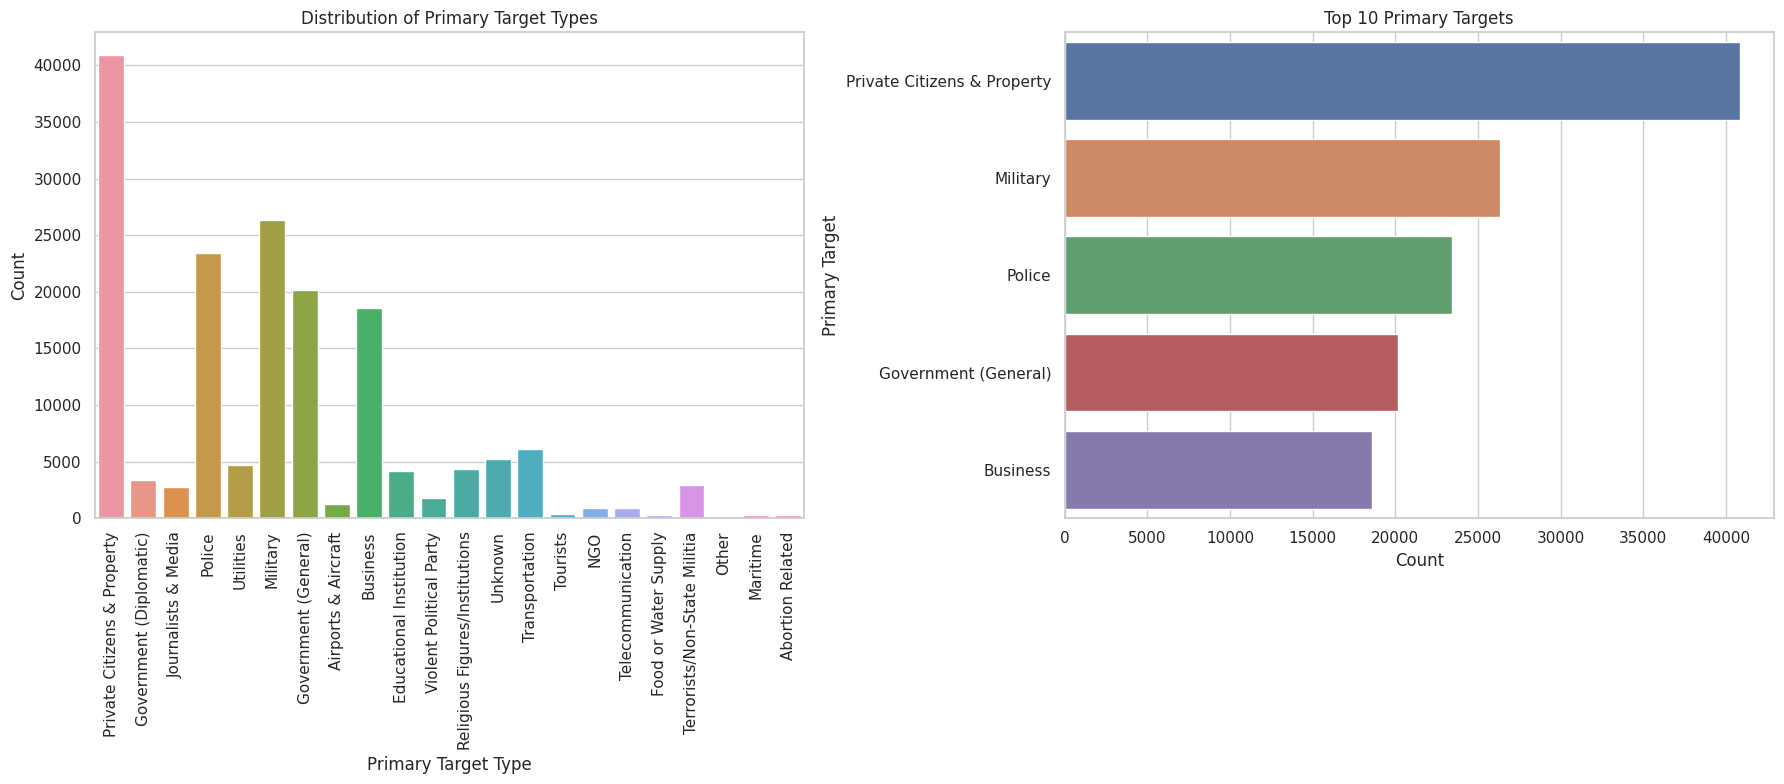

In [ ]:
plt.figure(figsize=(18, 8))

# Plot the distribution of Primary_Target_Type
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Target_Type')
plt.xticks(rotation=90)
plt.xlabel('Primary Target Type')
plt.ylabel('Count')
plt.title('Distribution of Primary Target Types')

# Plot the distribution of Primary_Target
plt.subplot(1, 2, 2)
target_counts = df['Target_Type'].value_counts().head(5)
sns.barplot(x=target_counts, y=target_counts.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Primary Target')
plt.title('Top 10 Primary Targets')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Select columns with object data type
object_columns = df.select_dtypes(include=['object'])
object_columns.columns

Index(['Country', 'Region', 'State', 'City', 'Summary', 'Attack_Type',
       'Target_Type', 'Terrorist_Group', 'Motive', 'Weapon_Type',
       'Related_Incidents'],
      dtype='object')

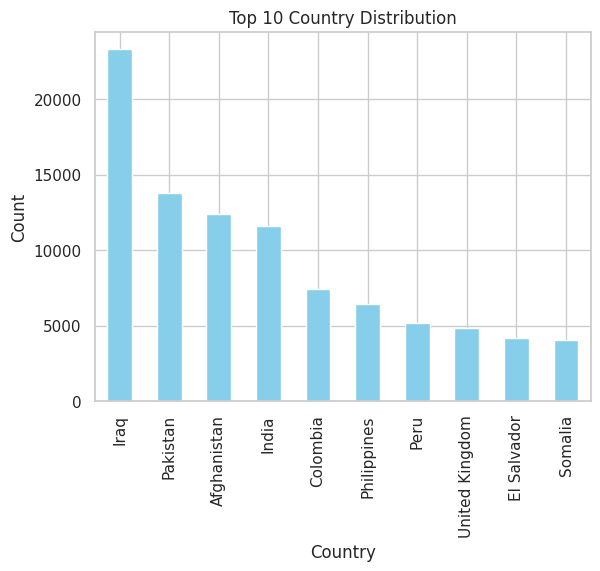

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar plot for the 'Country' column
country_counts = df['Country'].value_counts()[:10]
country_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Country Distribution')
plt.show()


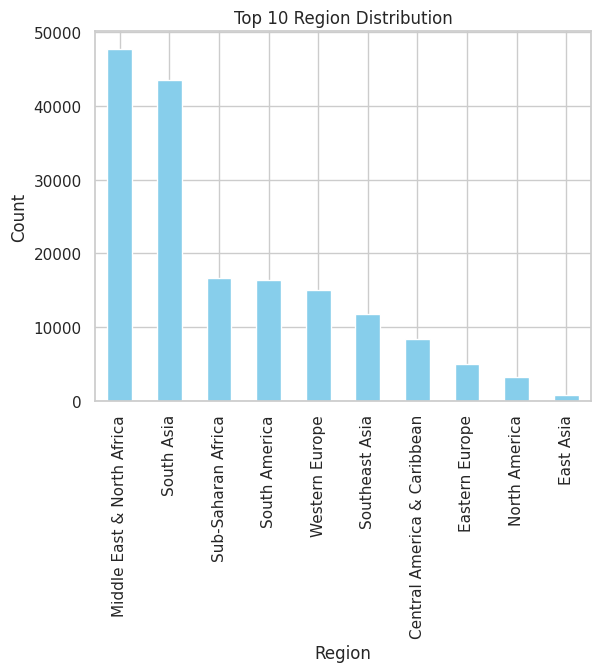

In [ ]:
# Create a bar plot for the 'Region' column
region_counts = df['Region'].value_counts()[:10]
region_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Top 10 Region Distribution')
plt.show()


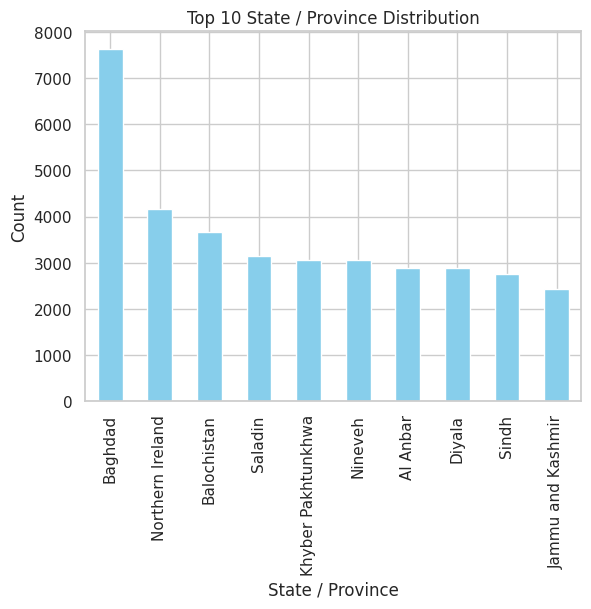

In [ ]:
# Create a bar plot for the 'State' column
state_counts = df['State'].value_counts()[:10]
state_counts.plot(kind='bar', color='skyblue')
plt.xlabel('State / Province')
plt.ylabel('Count')
plt.title('Top 10 State / Province Distribution')
plt.show()


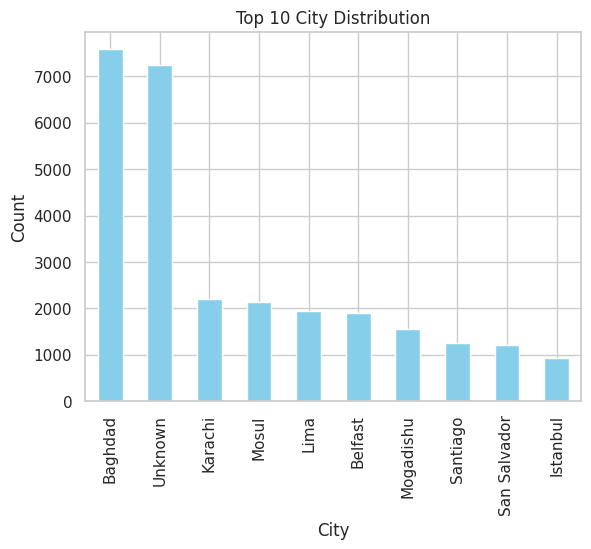

In [ ]:
# Create a bar plot for the 'City' column
city_counts = df['City'].value_counts()[:10]
city_counts.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 10 City Distribution')
plt.show()


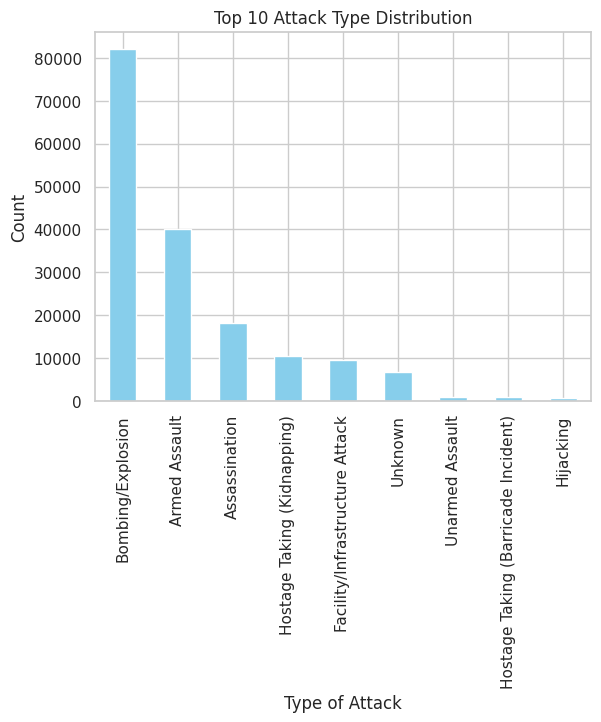

In [ ]:
# Create a bar plot
city_counts = df['Attack_Type'].value_counts()[:10]
city_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Type of Attack')
plt.ylabel('Count')
plt.title('Top 10 Attack Type Distribution')
plt.show()


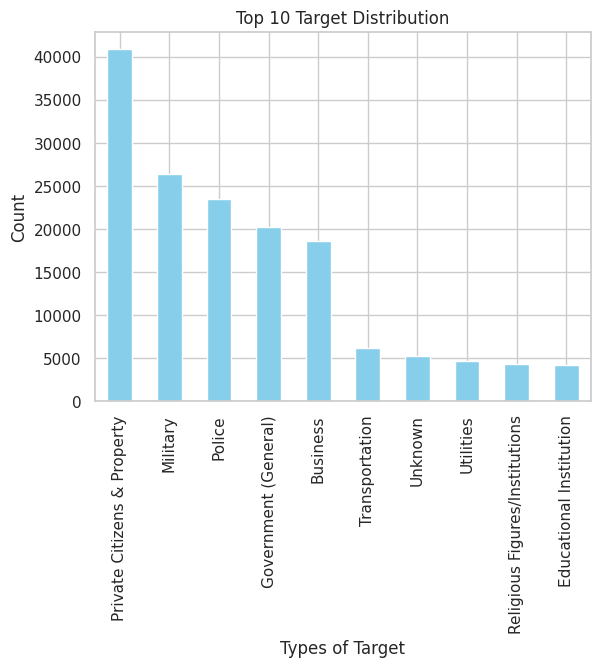

In [ ]:
# Create a bar plot
city_counts = df['Target_Type'].value_counts()[:10]
city_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Types of Target')
plt.ylabel('Count')
plt.title('Top 10 Target Distribution')
plt.show()


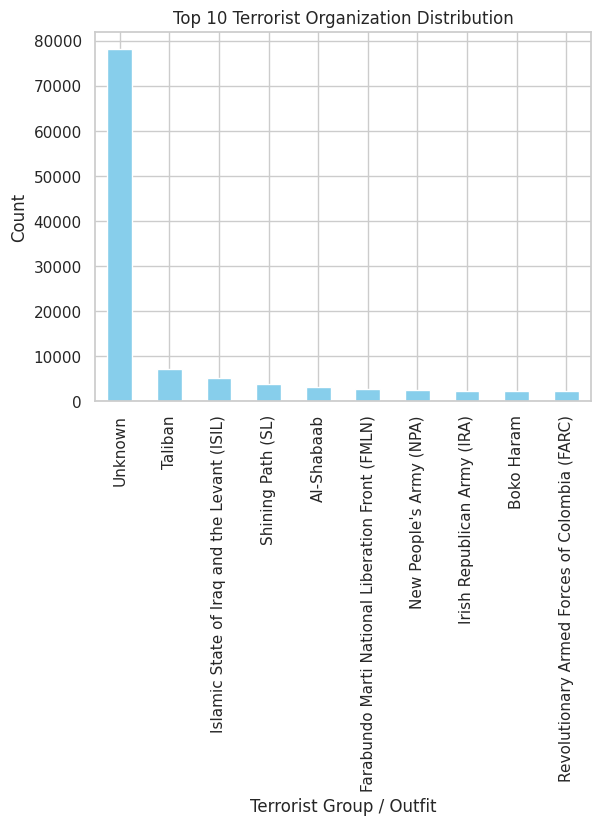

In [ ]:
# Create a bar plot
city_counts = df['Terrorist_Group'].value_counts()[:10]
city_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Terrorist Group / Outfit')
plt.ylabel('Count')
plt.title('Top 10 Terrorist Organization Distribution')
plt.show()


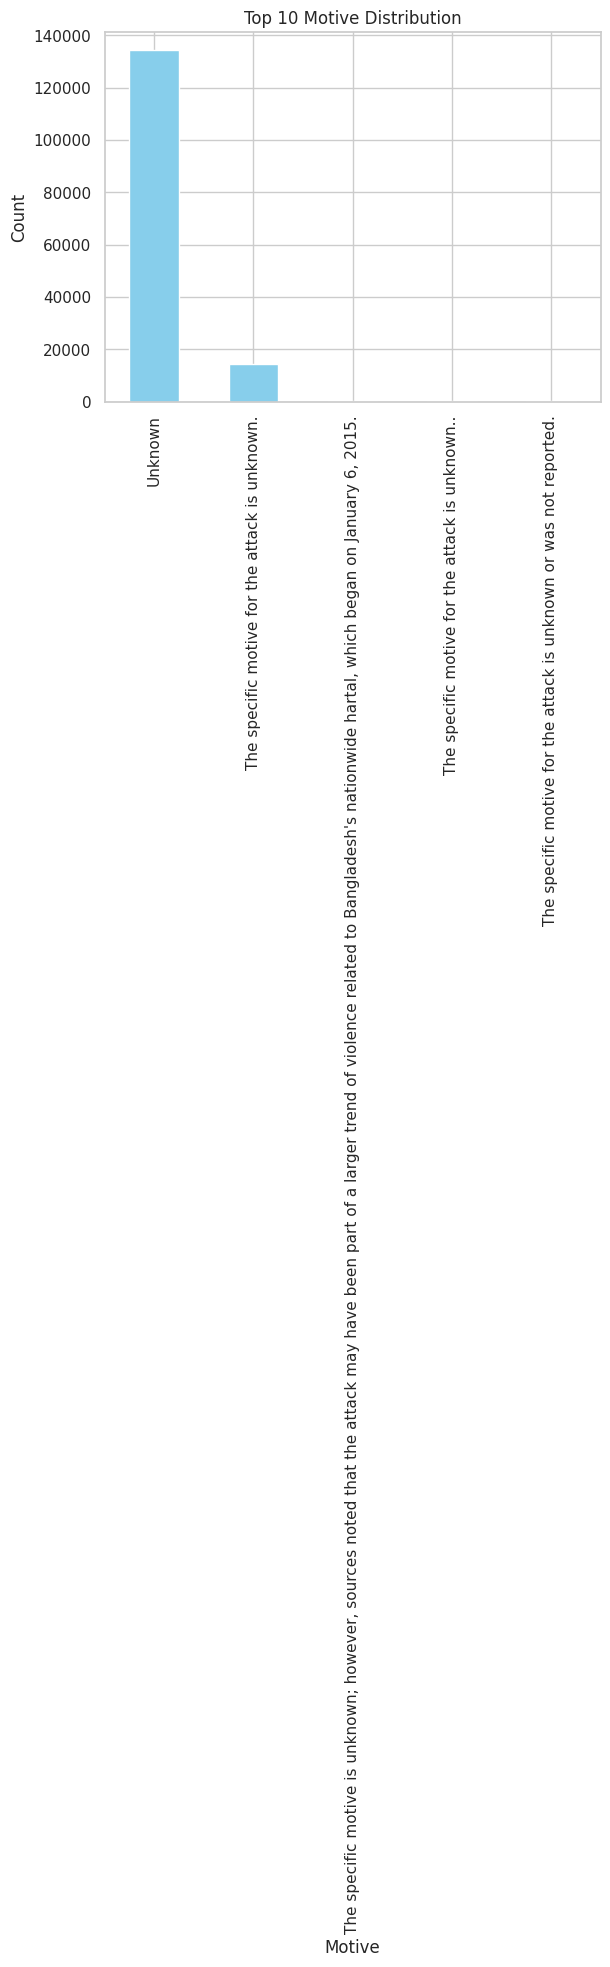

In [ ]:
# Create a bar plot
city_counts = df['Motive'].value_counts()[:5]
city_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Motive')
plt.ylabel('Count')
plt.title('Top 10 Motive Distribution')
plt.show()


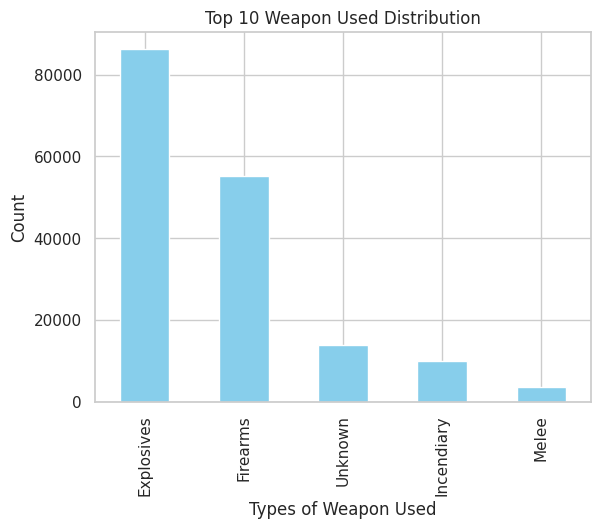

In [ ]:
# Create a bar plot
city_counts = df['Weapon_Type'].value_counts()[:5]
city_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Types of Weapon Used')
plt.ylabel('Count')
plt.title('Top 10 Weapon Used Distribution')
plt.show()


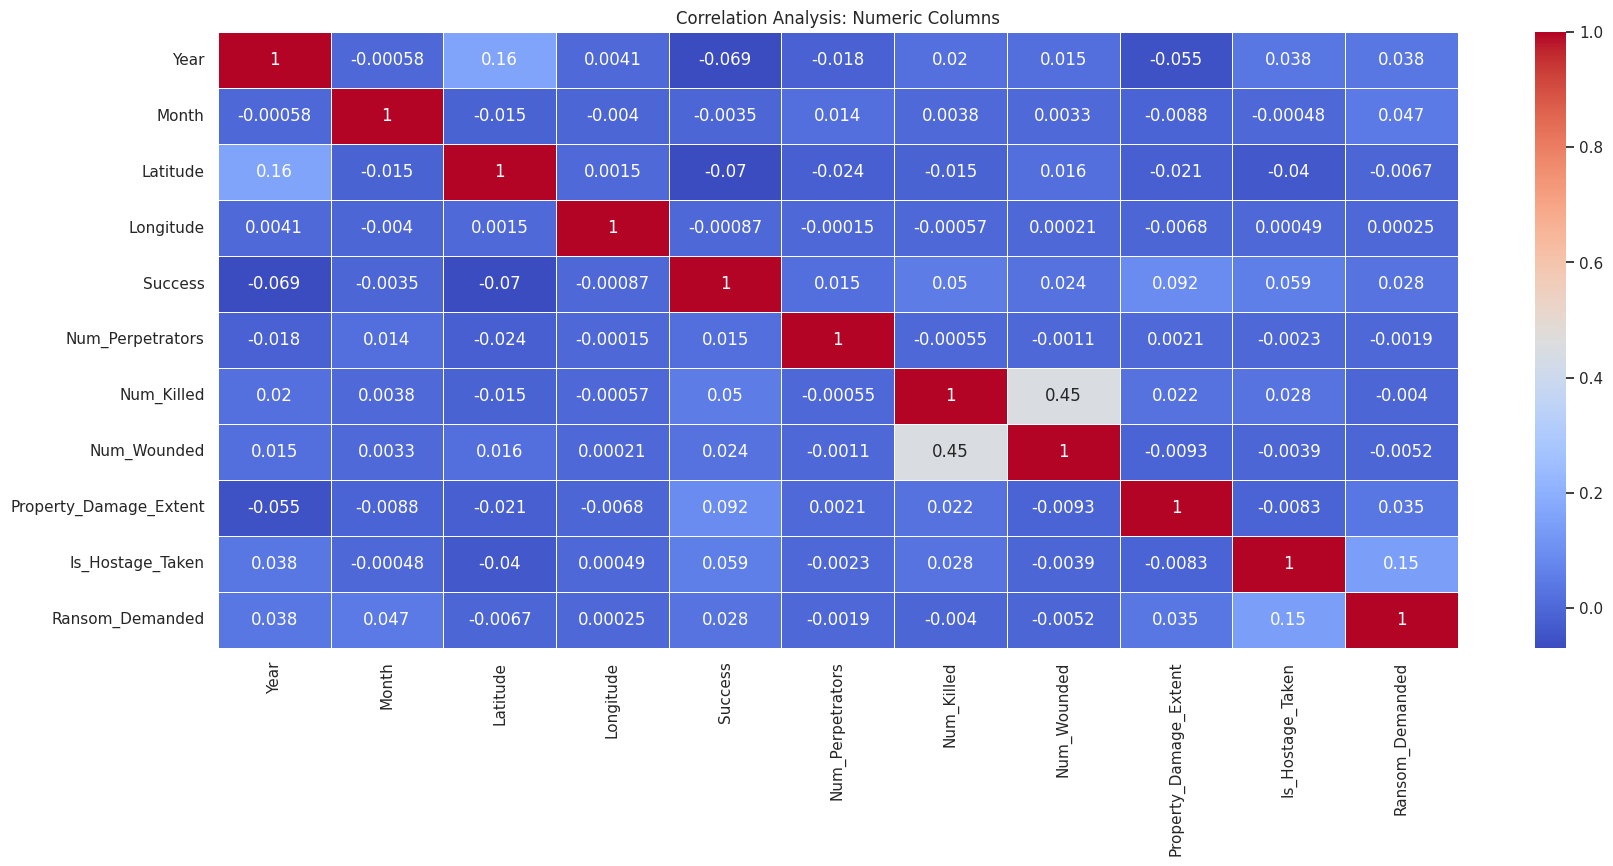

In [ ]:
# Select only integer and float type columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Analysis: Numeric Columns')
plt.show()


Number of rows with a value of 0 in the 'Month' column: 15


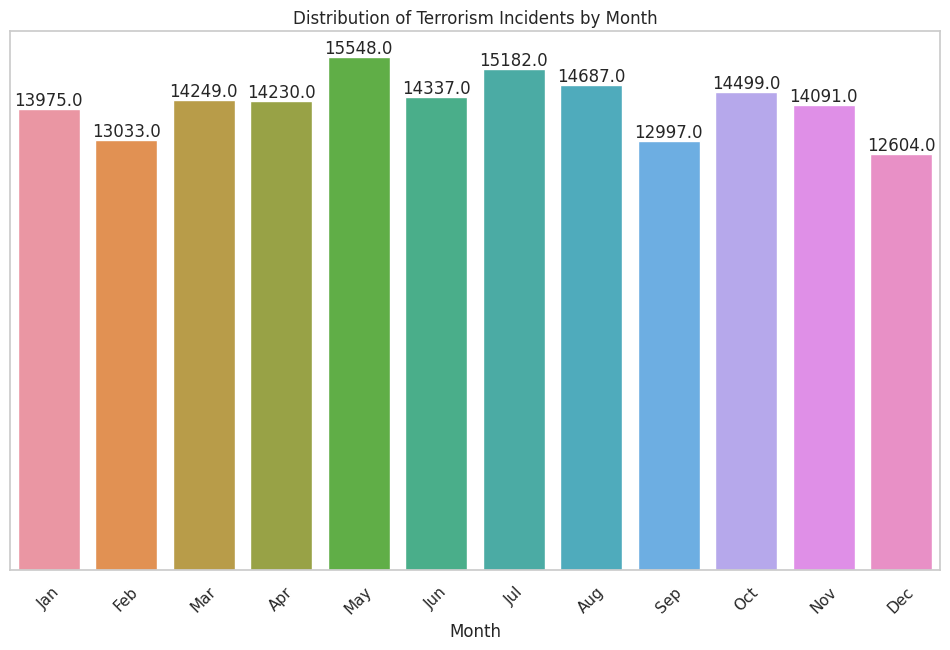

In [ ]:
# Count the number of rows with a value of 0 in the "Month" column
zero_count = (df["Month"] == 0).sum()

print(f"Number of rows with a value of 0 in the 'Month' column: {zero_count}")

new_df = df[df["Month"] != 0]
new_df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12, 7))
ax = sns.countplot(data=new_df, x="Month")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('')
plt.title('Distribution of Terrorism Incidents by Month')
custom_xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), custom_xtick_labels, rotation=45)

# Remove the y-axis ticks and labels
ax.set_yticks([])

plt.show()


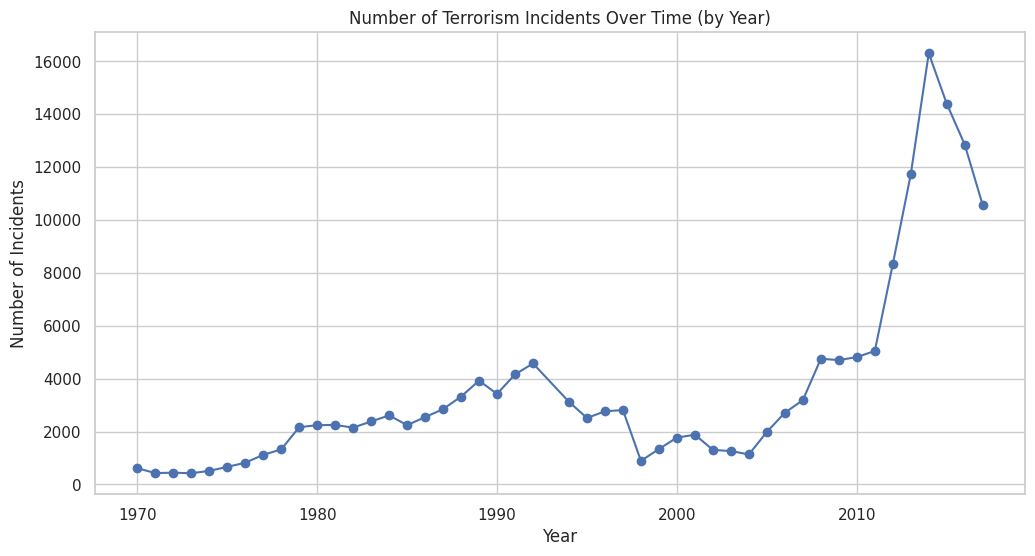

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a 'Year' column, convert it to a datetime type
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group the data by year and count the number of incidents
incidents_by_year = df.groupby(df['Year'].dt.year).size()

# Plot the number of incidents over time (by year)
plt.figure(figsize=(12, 6))
incidents_by_year.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Number of Terrorism Incidents Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()
